In [1]:
import re
import random
import string
from collections import defaultdict
from tqdm import tqdm
from itertools import combinations

def generate_word_list(n, word_length):
    word_list = []
    for _ in range(n):
        word = ''.join(random.choices(string.ascii_lowercase, k=word_length))
        word_list.append(word)
    return word_list


def precompute_probabilities(word_list):
    pattern_probs = defaultdict(lambda: defaultdict(int))
    for word in tqdm(word_list):
        word_length = len(word)
        for num_letters_missing in range(word_length):
            for indices in combinations(range(word_length), num_letters_missing):
                pattern = ['_'] * word_length
                for index in indices:
                    pattern[index] = word[index]
                pattern = ''.join(pattern)
                # print(pattern, indices, word)
                for index in range(word_length):
                    if index not in indices:
                        pattern_probs[pattern][word[index]] += 1

    return pattern_probs

def get_best_guess(pattern, pattern_probs, guessed):
    if pattern not in pattern_probs: # return random guess
        print("pattern not in pattern_probs")
        return random.choice([letter for letter in string.ascii_lowercase if letter not in guessed])
    return max((letter for letter in string.ascii_lowercase if letter not in guessed),
               key=lambda letter: pattern_probs[pattern][letter])

def play_hangman_known(word, pattern_probs, max_guesses):
    # print(f"Playing hangman with word: {word}")
    pattern = ['_'] * len(word)
    guessed = set()
    wrong_guesses = 0
    while wrong_guesses < max_guesses:
        if '_' not in pattern:
            return True
        guess = get_best_guess(''.join(pattern), pattern_probs, guessed)
        # print(f"Current pattern: {''.join(pattern)}", " Guess: ", guess)
        if guess is None:
            return False
        if guess in word:
            for i in range(len(word)):
                if word[i] == guess:
                    pattern[i] = guess
        else:
            wrong_guesses += 1
        guessed.add(guess)
    return False

def simulate_hangman(word_list, pattern_probs, max_guesses):
    wins = 0
    for word in tqdm(word_list):
        if play_hangman_known(word, pattern_probs, max_guesses):
            wins += 1
    return wins / len(word_list)

In [12]:
def calculate_average_winning_probability(word_length, max_guesses):
    # 初始化获胜概率列表
    winning_probabilities = []

    # 进行五次试验
    for _ in range(5):
        # 设置参数
        num_words = 10000

        # 生成随机单词列表
        word_list = generate_word_list(num_words, word_length)

        pattern_probs = precompute_probabilities(word_list)

        # 模拟游戏并计算获胜概率
        winning_probability = simulate_hangman(word_list, pattern_probs, max_guesses)

        # 将获胜概率添加到列表中
        winning_probabilities.append(winning_probability)

    # 计算平均获胜概率
    average_winning_probability = sum(winning_probabilities) / len(winning_probabilities)

    return average_winning_probability

100%|██████████| 10000/10000 [00:01<00:00, 6086.15it/s]


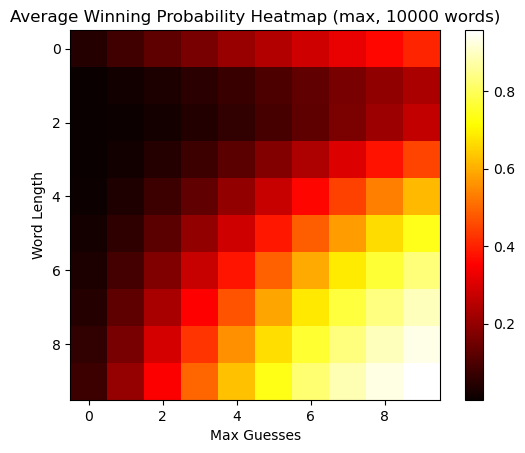

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# 初始化结果矩阵
results = np.zeros((10, 10))

# # 遍历所有可能的word_length和max_guesses值
# for word_length in range(1, 11):
#     for max_guesses in range(1, 11):
#         # 计算平均获胜概率
#         average_winning_probability = calculate_average_winning_probability(word_length, max_guesses)
        
#         # 存储结果
#         results[word_length-1, max_guesses-1] = average_winning_probability

# 创建热力图
plt.imshow(results, cmap='hot', interpolation='nearest')

# 添加颜色条
plt.colorbar()

# 设置标题和轴标签
plt.title('Average Winning Probability Heatmap (max, 10000 words)')
plt.xlabel('Max Guesses')
plt.ylabel('Word Length')

# 显示图形
plt.show()

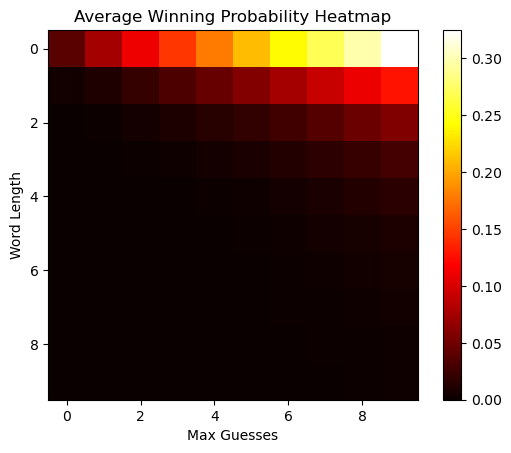

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# 初始化结果矩阵
results = np.zeros((10, 10))

# 遍历所有可能的word_length和max_guesses值
for word_length in range(1, 11):
    for max_guesses in range(1, 11):
        # 计算平均获胜概率
        average_winning_probability = calculate_average_winning_probability(word_length, max_guesses)
        
        # 存储结果
        results[word_length-1, max_guesses-1] = average_winning_probability

# 创建热力图
plt.imshow(results, cmap='hot', interpolation='nearest')

# 添加颜色条
plt.colorbar()

# 设置标题和轴标签
plt.title('Average Winning Probability Heatmap')
plt.xlabel('Max Guesses')
plt.ylabel('Word Length')

# 显示图形
plt.show()

In [2]:
# now we load dict from file
word_file = 'dataset/words_250000_train.txt'

# get word_list from file
with open(word_file, 'r') as f:
    word_list = f.readlines()

# remove newline characters
word_list = [word.strip() for word in word_list]

# precompute pattern probabilities
pattern_probs = precompute_probabilities(word_list)

# 模拟游戏并计算获胜概率
winning_probability = simulate_hangman(word_list, pattern_probs, 6)

KeyboardInterrupt: 